# TFM: Parte 2. Modelado y validación

En esta segunda parte crearemos y validaremos los distintos modelos partiendo de los datos previamente limiados.

In [10]:
from TFM import Classifier

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

# Visualizacion.
import matplotlib.pyplot as plt

%matplotlib inline

## Importación del conjunto de datos limpio

Importamos el conjunto de datos limpiado con R. 

In [11]:
data = pd.read_csv('sensor_clean.csv')
data = data.drop(columns=["Unnamed: 0"])

y = data["alert"]
X = data.drop(columns=["machine_status", "timestamp", "alert"])

X.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
count,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,...,213244.000000,213244.000000,213244.00000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000,213244.000000
mean,2.337660,47.951825,51.306266,44.010858,609.527984,72.846504,13.568645,15.905268,15.245332,14.871856,...,35.726563,35.743417,44.36582,43.074012,43.512284,48.593665,44.763556,154.839580,57.973413,194.681947
std,0.496014,2.608940,2.747263,1.926234,100.672509,16.441155,1.996743,2.019679,1.909419,1.852870,...,7.750406,10.288640,10.87549,11.521259,12.827958,15.560495,10.332781,80.615128,18.841716,68.025401
min,0.000984,0.000000,33.810760,33.289930,2.798032,0.000000,0.014468,0.000000,0.028935,0.007234,...,20.833330,22.656250,25.26042,26.620370,26.331020,27.488430,27.777780,27.199070,27.777780,28.067130
25%,2.434896,46.527770,50.520830,43.012150,627.430500,69.844153,13.346350,15.914350,15.183740,15.053530,...,32.812500,32.812500,40.10416,37.326390,37.326390,40.798610,39.351850,88.252310,48.321760,179.108800
50%,2.455556,48.177080,51.692710,44.270830,632.986100,75.316180,13.642940,16.167530,15.494790,15.082470,...,35.156250,35.156250,43.22916,40.798610,40.509260,45.138890,42.534720,142.071800,53.240740,197.338000
75%,2.499826,49.522570,52.821180,45.312500,637.847200,80.410462,14.539930,16.427950,15.697340,15.118630,...,37.760410,37.500000,46.87500,45.428240,45.138890,51.793980,46.875000,210.937500,61.342590,215.856500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,21.390340,23.596640,24.348960,25.000000,...,420.312500,374.218800,408.59370,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000


## División del conjunto de datos en train y test

Para poder entrenar los distintos modelos primero tendremos que dividir el dataset en dos subconjuntos: el conjunto de train (70% de los datos) con el que se entrenaran los modelos y el conjunto de test (30% de los datos) con el que se validaran los modelos con datos que no hayan visto en el entrenamiento.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)


print("Train: X=%s, y=%s" % (X_train.shape, y_train.shape))
print("Test: X=%s, y=%s" % (X_test.shape, y_test.shape))


Train: X=(149270, 48), y=(149270,)
Test: X=(63974, 48), y=(63974,)


## Normalización y PCA

Antes de poder entrenar los modelos necesitaremos primero normalizar los datos de entrada y segundo reducir la dimensionalidad de estos.

La normalización de datos consiste en modificar los datos para lograr que estén en una escala de valores equivalentes que simplifique la comparación entre ellos. La técnica de normalización que he escogido será basada en la desviación estándar, también llamada estandarización, donde obtendremos valores de media 0 y desviación estándar 1. Con este tipo de normalización se mantienen los valores extremos, que como vimos en la parte anterior, aparecen con bastante frecuencia en nuestros datos.

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51
count,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,...,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05
mean,7.173497e-17,-5.958358e-16,2.487637e-15,-1.435651e-16,-4.854844e-16,1.052938e-15,-1.462308e-16,4.202708e-16,-4.021942e-16,1.680797e-15,...,-2.285808e-16,-1.567983e-16,-3.330654e-16,9.907352e-16,9.329830e-17,3.865215e-17,1.202917e-15,6.845049e-17,3.093124e-16,-4.574473e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-4.698071e+00,-1.833659e+01,-6.354168e+00,-5.565214e+00,-6.016662e+00,-4.414501e+00,-6.803733e+00,-7.905149e+00,-7.999592e+00,-8.051151e+00,...,-1.904199e+00,-1.261731e+00,-1.737879e+00,-1.410437e+00,-1.314373e+00,-1.355506e+00,-1.645324e+00,-1.581807e+00,-1.602660e+00,-2.463128e+00
25%,1.980994e-01,-5.437152e-01,-2.849562e-01,-5.191591e-01,1.779326e-01,-1.806608e-01,-1.113398e-01,3.261885e-03,-3.355322e-02,9.682604e-02,...,-3.728984e-01,-2.835772e-01,-3.875931e-01,-4.931107e-01,-4.812180e-01,-5.000044e-01,-5.237654e-01,-8.282075e-01,-5.275891e-01,-2.287366e-01
50%,2.376646e-01,8.700436e-02,1.406787e-01,1.341246e-01,2.330285e-01,1.504877e-01,3.754363e-02,1.290761e-01,1.299485e-01,1.124978e-01,...,-7.329610e-02,-5.784948e-02,-1.033223e-01,-1.955998e-01,-2.335232e-01,-2.210361e-01,-2.153368e-01,-1.571444e-01,-2.511425e-01,3.665061e-02
75%,3.266842e-01,6.015388e-01,5.505468e-01,6.747752e-01,2.812369e-01,4.589745e-01,4.878183e-01,2.584881e-01,2.364178e-01,1.320795e-01,...,2.595945e-01,1.678783e-01,2.283276e-01,2.010817e-01,1.267601e-01,1.695194e-01,2.052478e-01,6.969346e-01,1.788857e-01,3.148798e-01
max,4.255971e-01,3.273788e+00,1.717098e+00,2.184089e+00,1.889336e+00,1.649161e+00,3.926615e+00,3.820867e+00,4.784094e+00,5.483109e+00,...,4.906147e+01,3.259744e+01,3.313267e+01,8.199185e+01,2.154110e+01,2.068298e+01,2.507581e+01,5.046282e+00,2.157279e+01,1.191488e+01


Después de normalizar los datos aplicaremos el método de análisis de componentes principales (Principal Component Analysis, PCA) para reducir el número de dimensiones.

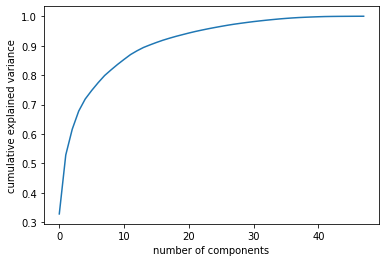

Explained variance with 15 components: 0.9026062935584299


In [14]:
pca = PCA()
pca.fit(X_train)
X_pca = pca.transform(X_train)

expl = pca.explained_variance_ratio_

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

print('Explained variance with 15 components:', sum(expl[0:15]))

Vemos que con 15 componentes tenemos el 90.26% de la varianza explicada.

In [15]:
pca = PCA(n_components=15)
pca.fit(X_train)

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05,1.492700e+05
mean,-5.055245e-17,7.235379e-18,-1.389954e-17,-9.329830e-18,2.465741e-17,-3.284481e-18,-3.486786e-17,-3.308282e-18,1.713642e-18,-2.142053e-17,-8.996622e-18,-1.478016e-17,-6.140552e-18,1.447076e-17,1.570839e-17
std,3.968696e+00,3.101342e+00,2.049691e+00,1.720865e+00,1.399306e+00,1.181904e+00,1.128160e+00,1.082461e+00,9.617774e-01,9.400102e-01,9.038218e-01,8.883250e-01,7.861209e-01,7.348788e-01,6.494487e-01
min,-6.688154e+00,-9.532136e+00,-4.151648e+00,-1.333882e+01,-1.133159e+01,-2.282895e+01,-1.036850e+01,-1.353800e+01,-7.722977e+00,-6.425357e+00,-1.035353e+01,-7.382617e+00,-7.776802e+00,-6.099863e+00,-7.875327e+00
25%,-1.905555e+00,-1.340155e+00,-8.405274e-01,-1.333692e+00,-9.857631e-01,-6.112250e-01,-3.649089e-01,-5.684299e-01,-5.343876e-01,-5.742328e-01,-4.356974e-01,-4.797260e-01,-4.610911e-01,-3.964160e-01,-4.163749e-01
50%,-1.261775e+00,-4.791096e-01,-1.846197e-01,-1.668163e-01,-1.774889e-01,-6.037700e-02,-7.191811e-02,-3.333444e-02,-5.242906e-02,-6.234151e-02,9.156861e-03,-8.895405e-02,-4.330748e-02,4.879451e-02,-5.955809e-02
75%,-5.806597e-01,2.698465e-01,5.436463e-01,1.070772e+00,8.797586e-01,5.608705e-01,2.316614e-01,5.455413e-01,4.137712e-01,4.717027e-01,4.402749e-01,3.738118e-01,4.462306e-01,4.089146e-01,3.577042e-01
max,1.236986e+01,2.023536e+01,8.294503e+01,2.112667e+01,2.008960e+01,2.827185e+01,1.110035e+01,1.569261e+01,1.111517e+01,2.362331e+01,2.737685e+01,8.398284e+00,1.837075e+01,1.607044e+01,1.514128e+01


## Exploración de modelos

En esta parte entrenaremos múltiples modelos de clasificación proporcionados por la librería sklearn y compararemos sus resultados para ver cuál ha sido el modelo que mejores resultados da. Si el clasificador tiene hiperparámetros utilizaré el mecanismo GridSearch con un kfold de 3 para ver cuál es la mejor combinación de estos. De igual forma, si no se requiere tunear hiperparámetros se realizara una validación cruzada de Kfold 3. Las validaciones cruzadas y el entrenamiento se realizarán utilizando el conjunto de train mientras que las validaciones (el cálculo de la matriz de confusión y las métricas de F1score, exactitud, sensibilidad, especificidad y precisión) se realizaran utilizando los datos de test.

In [16]:
classifiers = [
    Classifier("Gaussian Naive Bayes", GaussianNB(), reFit = False),
    Classifier("Bernoulli Naive Bayes", BernoulliNB(), needsGridSearch=True, parameters= {'alpha': [.1, 1, 2]}, reFit = False),
    Classifier("K-nearest Neighbors", KNeighborsClassifier(), needsGridSearch=True, parameters= {'n_neighbors': [1, 3, 5]}, reFit = False),
    Classifier("Nearest Centroid", NearestCentroid(), reFit = False),
    Classifier("C-Support Vector", SVC(), needsGridSearch=True, parameters= {'C': [.1, 1, 10], 'gamma': ["scale", 1, 10]}, reFit = False),
    Classifier("Decision tree", DecisionTreeClassifier(), needsGridSearch=True, parameters={'max_depth': [None, 5, 10], 'min_samples_split': [.1, .2, 2, 20, 50]}, reFit = False),
    Classifier("Random forest", RandomForestClassifier(), needsGridSearch=True, parameters={'n_estimators': [100, 150, 200], 'min_samples_split': [.1, .2, 2]}, reFit = False),
    Classifier("Extra Trees", ExtraTreesClassifier(), needsGridSearch=True, parameters={'n_estimators': [100, 150, 200], 'min_samples_split': [.1, .2, 2]}, reFit = False),
    Classifier("AdaBoost", AdaBoostClassifier(), needsGridSearch=True, parameters={'n_estimators': [25, 50, 100], 'learning_rate': [.1, 1, 10]}, reFit = False),
    Classifier("Gradient Boosting", GradientBoostingClassifier(), needsGridSearch=True, parameters={'n_estimators': [50, 100, 200], 'learning_rate': [.1, 1, 10]}, reFit = False),
    Classifier("Multi-layer Perceptron", MLPClassifier(max_iter=1000), needsGridSearch=True, reFit = False, 
    parameters={'hidden_layer_sizes': [(30), (60), (100), (15, 15)],'solver': ["lbfgs", "sgd", "adam"], 'alpha': [.0001, .001, .00001], 'learning_rate': ["constant", "invscaling", "adaptive"]}),
]


In [20]:
for c in classifiers:
    c.process(X_train, y_train, X_test, y_test)
    if not c.reFit:
        c.printFitRecord()


Gaussian Naive Bayes accuaracy: 0.866
Bernoulli Naive Bayes accuaracy: 0.865
K-nearest Neighbors accuaracy: 1.000
Nearest Centroid accuaracy: 0.845
C-Support Vector accuaracy: 0.999
Decision tree accuaracy: 0.987
Random forest accuaracy: 0.998
Extra Trees accuaracy: 0.999
AdaBoost accuaracy: 0.959
Gradient Boosting accuaracy: 0.994
Multi-layer Perceptron accuaracy: 0.999


In [21]:
results = pd.DataFrame(columns=["model_name", "F1score", "accuracy", "sensitivity", "specificity", "precision", "Kfold"])
for c in classifiers:
    results = results.append({
        "model_name": c.name, 
        "F1score": c.getF1Score(), 
        "accuracy": c.getAccuracy(), 
        "sensitivity": c.getSensitivity(), 
        "specificity": c.getSpecificity(), 
        "precision": c.getPrecision(),
        "Kfold" : c.getCrossValidation()
        }, ignore_index=True)

results = results.sort_values(by=["F1score"], ascending=False)
results

,model_name,F1score,accuracy,sensitivity,specificity,precision,Kfold
2,K-nearest Neighbors,0.999437,0.999672,0.999250,0.999846,0.999625,0.999484
7,Extra Trees,0.998444,0.999093,0.997106,0.999912,0.999785,0.998499
10,Multi-layer Perceptron,0.997990,0.998828,0.998070,0.999139,0.997910,0.998406
4,C-Support Vector,0.997798,0.998718,0.995926,0.999868,0.999677,0.996959
6,Random forest,0.995778,0.997546,0.992389,0.999669,0.999191,0.996269
9,Gradient Boosting,0.990010,0.994185,0.987940,0.996756,0.992088,0.992370
5,Decision tree,0.978351,0.987386,0.977381,0.991504,0.979323,0.984511
8,AdaBoost,0.929596,0.959280,0.921799,0.974711,0.937527,0.958592
3,Nearest Centroid,0.784424,0.844577,0.969609,0.793102,0.658632,0.845200
1,Bernoulli Naive Bayes,0.773009,0.864758,0.789623,0.895690,0.757079,0.863368


En la tabla anterior podemos ver los resultados que han obtenido los diferentes modelos con el conjunto de train, el conjunto de datos que no fue utilizado en el proceso de entrenamiento.

Podemos ver como el modelo con más F1 score es el K-nearest Neighbors, con 0.9994 puntos. Posteriormente tenemos el modelo Extra trees, con 0.9984, la red neuronal, con 0.9980, y la SVC, con 0.9978. También podemos ver como el modelo KNN tiene una muy buena especificidad, la tasa de instancias correctamente clasificadas como negativas respecto a todas las instancias negativas, de 0.9998 puntos. Por otro lado, vemos que aunque la sensibilidad, la tasa de  verdaderos positivos, no es tan buena como la especificidad es también bastante buena: tiene 0.9992 puntos.

## Conclusiones

Vemos como curiosamente uno de los modelos más simples, el K-nearest Neighbors, ha resultado ser el que mejores resultados ha dado, por encima incluso de las redes neuronales. Este modelo ha conseguido unos resultados mucho mejores de los que podría esperar en un inicio y suficientemente prometedores como para aplicar todo el proceso que se ha seguido en este trabajo en distintas máquinas para poder beneficiarnos de las ventajas que ofrece el mantenimiento predictivo.